In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Load Required Libraries**

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

# **Download  dataset from Kaggle**

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahisoni","key":"849a648da8f2839419f1f7d5fea05a3d"}'}

In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! kaggle competitions download -c bengaliai-cv19

  0% 0.00/1.32M [00:00<?, ?B/s]
100% 1.32M/1.32M [00:00<00:00, 88.8MB/s]
  0% 0.00/944 [00:00<?, ?B/s]
100% 944/944 [00:00<00:00, 961kB/s]
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 84.8MB/s]
  0% 0.00/4.72k [00:00<?, ?B/s]
100% 4.72k/4.72k [00:00<00:00, 4.98MB/s]
  0% 0.00/1.28M [00:00<?, ?B/s]
100% 1.28M/1.28M [00:00<00:00, 84.3MB/s]
 99% 977M/991M [00:23<00:00, 36.4MB/s]
100% 991M/991M [00:23<00:00, 44.4MB/s]
  0% 0.00/1.30M [00:00<?, ?B/s]
100% 1.30M/1.30M [00:00<00:00, 86.6MB/s]
 99% 983M/992M [00:23<00:00, 64.3MB/s]
100% 992M/992M [00:24<00:00, 42.8MB/s]
  0% 0.00/16.8k [00:00<?, ?B/s]
100% 16.8k/16.8k [00:00<00:00, 17.7MB/s]
  0% 0.00/4.75k [00:00<?, ?B/s]
100% 4.75k/4.75k [00:00<00:00, 4.91MB/s]
 99% 987M/993M [00:23<00:00, 49.0MB/s]
100% 993M/993M [00:23<00:00, 45.0MB/s]
 99% 973M/986M [00:22<00:00, 23.9MB/s]
100% 986M/986M [00:22<00:00, 45.3MB/s]
  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 80.3MB/s]
  0% 0.00/1.70k [00:00<?, ?B/s]
100% 1

In [0]:
import os  
os.chdir('/content/')

In [5]:
! ls

class_map_corrected.csv        test_image_data_3.parquet
class_map.csv		       test_image_data_3.parquet.zip
gdrive			       train.csv
kaggle.json		       train.csv.zip
model.png		       train_image_data_0.parquet
sample_data		       train_image_data_0.parquet.zip
sample_submission.csv	       train_image_data_1.parquet
test.csv		       train_image_data_1.parquet.zip
test_image_data_0.parquet      train_image_data_2.parquet
test_image_data_0.parquet.zip  train_image_data_2.parquet.zip
test_image_data_1.parquet      train_image_data_3.parquet
test_image_data_1.parquet.zip  train_image_data_3.parquet.zip
test_image_data_2.parquet      train_multi_diacritics.csv
test_image_data_2.parquet.zip


In [0]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
!unzip test_image_data_0.parquet.zip
!unzip test_image_data_1.parquet.zip
!unzip test_image_data_2.parquet.zip
!unzip test_image_data_3.parquet.zip

Archive:  test_image_data_0.parquet.zip
  inflating: test_image_data_0.parquet  
Archive:  test_image_data_1.parquet.zip
  inflating: test_image_data_1.parquet  
Archive:  test_image_data_2.parquet.zip
  inflating: test_image_data_2.parquet  
Archive:  test_image_data_3.parquet.zip
  inflating: test_image_data_3.parquet  


In [0]:
!unzip train_image_data_0.parquet.zip
!unzip train_image_data_1.parquet.zip
!unzip train_image_data_2.parquet.zip
!unzip train_image_data_3.parquet.zip

Archive:  train_image_data_0.parquet.zip
  inflating: train_image_data_0.parquet  
Archive:  train_image_data_1.parquet.zip
  inflating: train_image_data_1.parquet  
Archive:  train_image_data_2.parquet.zip
  inflating: train_image_data_2.parquet  
Archive:  train_image_data_3.parquet.zip
  inflating: train_image_data_3.parquet  


#**Keras Neural Nework Model**

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input

In [0]:
inputs = Input(shape = (137, 236, 1))

model = Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu', input_shape=(137,236, 1))(inputs)
model = Conv2D(filters=32, kernel_size=3,strides=2, padding='SAME', activation='relu')(model)

model = Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)

model = Conv2D(filters=32, kernel_size=5, padding='SAME', activation='relu')(model)
model = Dropout(rate=0.4)(model)

model = Conv2D(filters=64, kernel_size=3, strides=2,padding='SAME', activation='relu')(model)
model = Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)

model = Conv2D(filters=64, kernel_size=5, padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=128, kernel_size=3,strides=2, padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)

model = Conv2D(filters=128, kernel_size=5, padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.5)(model)

model = Conv2D(filters=256, kernel_size=3, padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)

model = Conv2D(filters=256, kernel_size=5, padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)
model = Dropout(rate=0.3)(model)

dense = Dense(256, activation = "relu")(model)

head_root = Dense(168, activation = 'softmax')(dense)
head_vowel = Dense(11, activation = 'softmax')(dense)
head_consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[head_root, head_vowel, head_consonant])

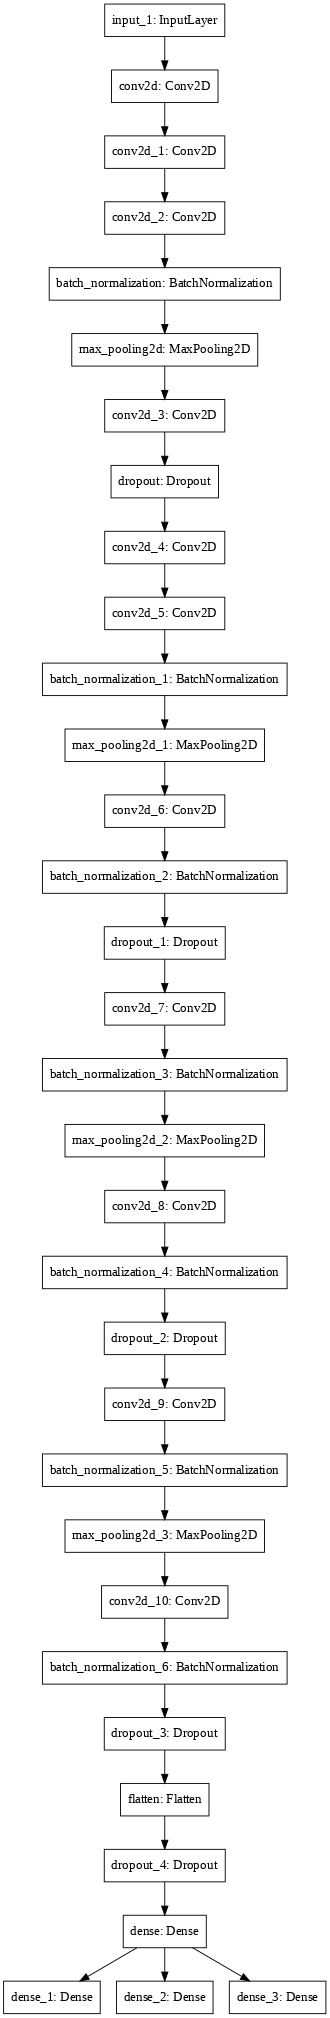

In [8]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=65
)

In [0]:
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 137, 236, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 137, 236, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 69, 118, 32)  9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 69, 118, 32)  9248        conv2d_1[0][0]                   
______________________________________________________________________________________________

In [0]:
tag_data= pd.read_csv('train.csv')

In [12]:
tag_data.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [0]:
tag_data = tag_data.drop(['grapheme','image_id'],axis=1)

In [0]:
tag_data_root = tag_data['grapheme_root'].values
tag_data_vowel = tag_data['vowel_diacritic'].values
tag_data_consonant = tag_data['consonant_diacritic'].values

In [15]:
len(tag_data_consonant)

200840

# **Train Model**

In [0]:
from sklearn.model_selection import train_test_split

In [17]:
dictionary = {}
for i in range(4):
    data  = pq.read_table(f'train_image_data_{i}.parquet').to_pandas()
    data = data.drop(['image_id'], axis=1)
    print("\n\n")
    print('=='*150)

    data = data.values.reshape(-1, 137, 236, 1)
    
    Y_train_root = tag_data_root[i*50210:(i+1)*50210]
    Y_train_vowel = tag_data_vowel[i*50210:(i+1)*50210]
    Y_train_consonant = tag_data_consonant[i*50210:(i+1)*50210]
    
    Y_train_root = tf.keras.utils.to_categorical(Y_train_root)
    Y_train_vowel = tf.keras.utils.to_categorical(Y_train_vowel)
    Y_train_consonant = tf.keras.utils.to_categorical(Y_train_consonant)

    x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(data, Y_train_root, Y_train_vowel, Y_train_consonant, test_size=0.2)

    history = model.fit(data, [Y_train_root, Y_train_vowel, Y_train_consonant], batch_size=128,epochs =10 ,validation_split = 0.05)

    if(i==0):
       l = list(history.history.keys())
       for j in l:
         dictionary[j] = list()
    for j in l:
      for k in range(len(history.history[j])):
        dictionary[j].append(history.history[j][k])

    del data
    del Y_train_root
    del Y_train_vowel
    del Y_train_consonant





Epoch 1/10
373/373 [==============================] - 39s 105ms/step - loss: 7.0457 - dense_1_loss: 4.6662 - dense_2_loss: 1.3027 - dense_3_loss: 1.0768 - dense_1_accuracy: 0.0335 - dense_2_accuracy: 0.5470 - dense_3_accuracy: 0.6373 - val_loss: 6.1692 - val_dense_1_loss: 4.3764 - val_dense_2_loss: 0.9400 - val_dense_3_loss: 0.8528 - val_dense_1_accuracy: 0.0510 - val_dense_2_accuracy: 0.6631 - val_dense_3_accuracy: 0.6890
Epoch 2/10
373/373 [==============================] - 38s 102ms/step - loss: 5.4677 - dense_1_loss: 4.0921 - dense_2_loss: 0.6683 - dense_3_loss: 0.7072 - dense_1_accuracy: 0.0653 - dense_2_accuracy: 0.7641 - dense_3_accuracy: 0.7433 - val_loss: 5.2557 - val_dense_1_loss: 3.8557 - val_dense_2_loss: 0.7440 - val_dense_3_loss: 0.6560 - val_dense_1_accuracy: 0.0820 - val_dense_2_accuracy: 0.7356 - val_dense_3_accuracy: 0.7539
Epoch 3/10
373/373 [==============================] - 38s 102ms/step - loss: 4.5473 - dense_1_loss: 3.4985 - dense_2_loss: 0.5320 - dense_3_los

In [0]:
 from matplotlib import figure 

# **Loss And Accuracy Graphs**

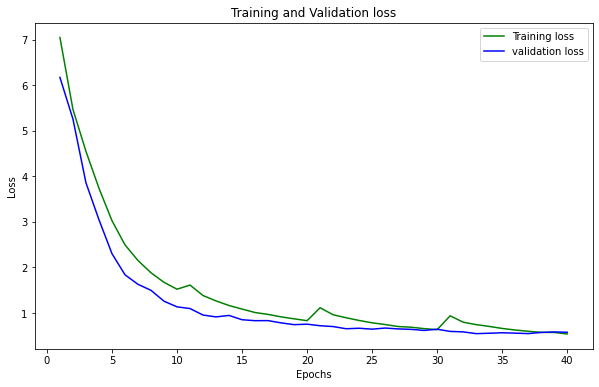

In [19]:
loss_train = dictionary['loss']
loss_val = dictionary['val_loss']
epochs = range(1,41)
plt.figure(figsize=(10,6))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

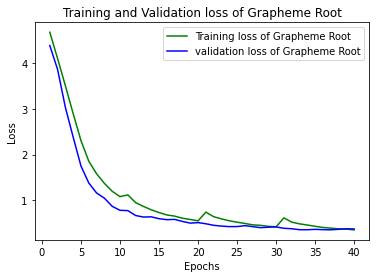

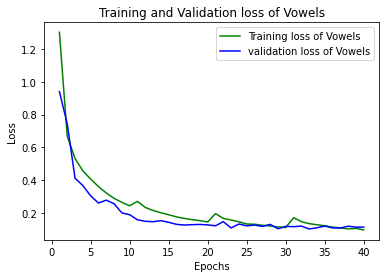

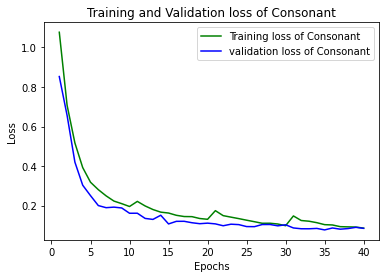

In [20]:
lis = ['Grapheme Root','Vowels','Consonant']
for i in range(1,4):
  loss_train = dictionary['dense_'+str(i)+'_loss']
  loss_val = dictionary['val_dense_'+str(i)+'_loss']
  epochs = range(1,41)
  plt.plot(epochs, loss_train, 'g', label='Training loss of '+lis[i-1])
  plt.plot(epochs, loss_val, 'b', label='validation loss of '+lis[i-1])
  plt.title('Training and Validation loss of '+lis[i-1])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

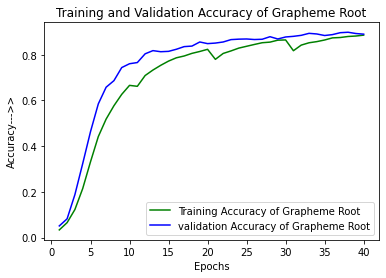

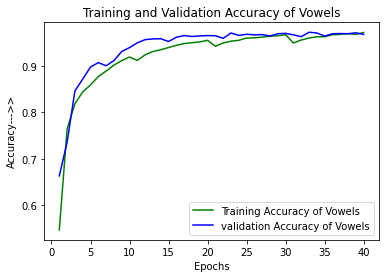

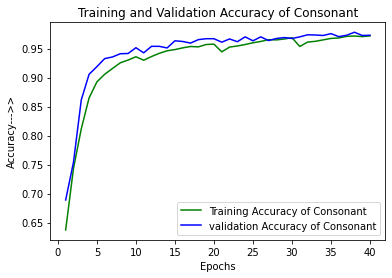

In [21]:
lis = ['Grapheme Root','Vowels','Consonant']
for i in range(1,4):
  loss_train = dictionary['dense_'+str(i)+'_accuracy']
  loss_val = dictionary['val_dense_'+str(i)+'_accuracy']
  epochs = range(1,41)
  plt.plot(epochs, loss_train, 'g', label='Training Accuracy of '+lis[i-1])
  plt.plot(epochs, loss_val, 'b', label='validation Accuracy of '+lis[i-1])
  plt.title('Training and Validation Accuracy of '+lis[i-1])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy--->>')
  plt.legend()
  plt.show()

# **Save Model In Drive**

In [0]:
os.chdir('/content/gdrive/My Drive')

In [0]:
model_json = model.to_json()
with open("model_data.json","w") as json_file:
  json_file.write(model_json)
  model.save("model_data.h5")

## **Load Test Data and Predict Output**

In [0]:
os.chdir('/content/')

In [0]:
preds_dict = {
    'grapheme_root': [],
    'vowel_diacritic': [],
    'consonant_diacritic': []
}

In [0]:
components = ['consonant_diacritic', 'grapheme_root', 'vowel_diacritic']
target=[] 
row_id=[] 

In [0]:
for i in range(4):
    df_test_img = pd.read_parquet('test_image_data_{}.parquet'.format(i)) 
    df_test_img.set_index('image_id', inplace=True)

    X_test = df_test_img.values.reshape(-1,137,236,1)
    
    preds = model.predict(X_test)

    for i, p in enumerate(preds_dict):
        preds_dict[p] = np.argmax(preds[i], axis=1)

    for k,id in enumerate(df_test_img.index.values):  
        for i,comp in enumerate(components):
            id_sample=id+'_'+comp
            row_id.append(id_sample)
            target.append(preds_dict[comp][k])
    del df_test_img
    del X_test

# **OutPut CSV File**

In [29]:
df_sample = pd.DataFrame(
    {
        'row_id': row_id,
        'target':target
    },
    columns = ['row_id','target'] 
)
#df_sample.to_csv('submission.csv',index=False)
df_sample.head()

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,3
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,93
